<img src="images/Peoplelogy-Logo.png" style="height: 100px;" align=left> <img src="images/sklearn-logo.png" style="height: 100px;" align=right>

# Clustering Project 2: Credit Card Customer Segmentation


---

<img src="images/card.jpeg" style="height: 500px; width: 1500px;" align=left>
<br>

---

## Objective
Group credit card customers based on their spending patterns to help financial institutions personalize offers and services.

---

## Dataset
### Columns:
1. **CUST_ID**: Identification of Credit Card holder (Categorical).
2. **BALANCE**: Balance amount left in their account to make purchases.
3. **BALANCE_FREQUENCY**: How frequently the balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated).
4. **PURCHASES**: Amount of purchases made from the account.
5. **ONEOFF_PURCHASES**: Maximum purchase amount done in one-go.
6. **INSTALLMENTS_PURCHASES**: Amount of purchase done in installments.
7. **CASH_ADVANCE**: Cash in advance given by the user.
8. **PURCHASES_FREQUENCY**: How frequently the purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased).
9. **ONEOFF_PURCHASES_FREQUENCY**: How frequently purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased).
10. **PURCHASES_INSTALLMENTS_FREQUENCY**: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done).
11. **CASH_ADVANCE_FREQUENCY**: How frequently the cash in advance is being paid.
12. **CASH_ADVANCE_TRX**: Number of transactions made with "Cash in Advance."
13. **PURCHASES_TRX**: Number of purchase transactions made.
14. **CREDIT_LIMIT**: Limit of the Credit Card for the user.
15. **PAYMENTS**: Amount of payment done by the user.
16. **MINIMUM_PAYMENTS**: Minimum amount of payments made by the user.
17. **PRC_FULL_PAYMENT**: Percent of full payment paid by the user.
18. **TENURE**: Tenure of credit card service for the user.

---


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_digits
from sklearn.metrics import davies_bouldin_score


## Tasks

### 1. Data Exploration
- Load the dataset and display the first few rows.
- Identify relevant features for clustering.
- Visualize feature distributions (e.g., `BALANCE`, `PURCHASES`, `CREDIT_LIMIT`).

---


In [2]:
df = pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
#2.Identify relevant features for clustering.BALANCE, PURCHASES, CREDIT_LIMIT
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

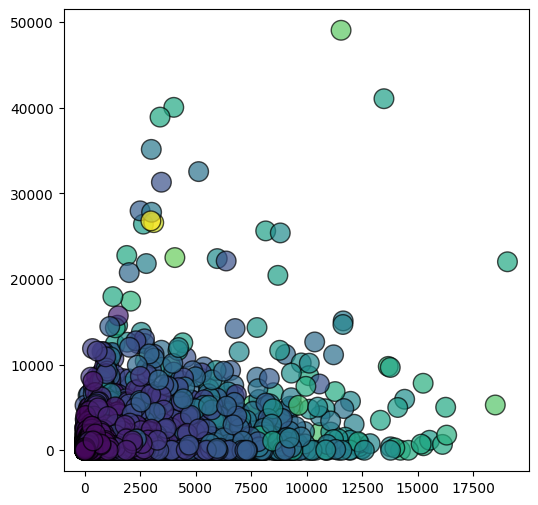

In [4]:
x = df.BALANCE
y = df['PURCHASES']
z = df['CREDIT_LIMIT']

fig = plt.figure(figsize=(6, 6))
plt.scatter(x, y,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=z)
plt.show()

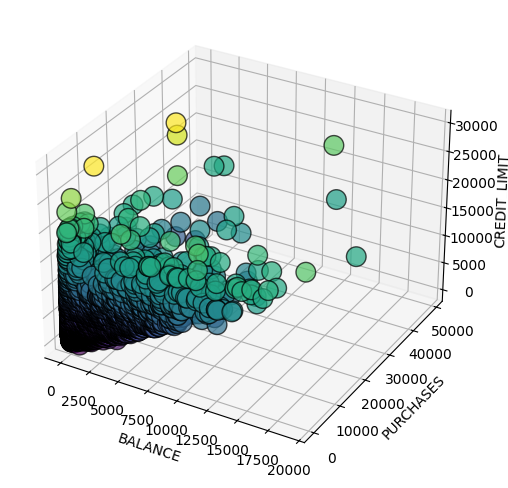

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = df.BALANCE
y = df['PURCHASES']
z = df['CREDIT_LIMIT']

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=z)
plt.xlabel("BALANCE")
plt.ylabel("PURCHASES")
ax.set_zlabel('CREDIT_LIMIT')
plt.show()


### 2. Preprocessing
- Select features such as `BALANCE`, `PURCHASES`, `CASH_ADVANCE`, `CREDIT_LIMIT`, `TENURE`, and `PAYMENTS`.
- Handle missing values (e.g., fill with the mean or median).
- Standardize the features using `StandardScaler`.

---


In [6]:
df[['BALANCE','PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','TENURE','PAYMENTS']]

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,TENURE,PAYMENTS
0,40.900749,95.40,0.000000,1000.0,12,201.802084
1,3202.467416,0.00,6442.945483,7000.0,12,4103.032597
2,2495.148862,773.17,0.000000,7500.0,12,622.066742
3,1666.670542,1499.00,205.788017,7500.0,12,0.000000
4,817.714335,16.00,0.000000,1200.0,12,678.334763
...,...,...,...,...,...,...
8945,28.493517,291.12,0.000000,1000.0,6,325.594462
8946,19.183215,300.00,0.000000,1000.0,6,275.861322
8947,23.398673,144.40,0.000000,1000.0,6,81.270775
8948,13.457564,0.00,36.558778,500.0,6,52.549959


In [7]:
#Check missing value: CREDIT_LIMIT has one missing value.
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
credit_mean = df['CREDIT_LIMIT'].mean()
credit_mean

4494.449450364621

In [46]:
#replace missing value with mean
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].replace(np.nan,credit_mean)

In [10]:
#Check back missing value on CREDIT_LIMIT. Now no missing values.
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
#Select features: 
features = df[['BALANCE','PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','TENURE','PAYMENTS']]
#Standardize the features:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

### 3. Clustering
#### **K-Means:**
1. Use the **Elbow Method** to determine the optimal number of clusters:
   - Plot the Within-Cluster-Sum of Squares (WCSS) for different \( K \) values and find the "elbow point."
2. Use the **Silhouette Method** to validate the number of clusters:
   - Compute the silhouette score for each value of \( K \) and plot the scores.
3. Apply K-Means clustering and visualize the clusters.


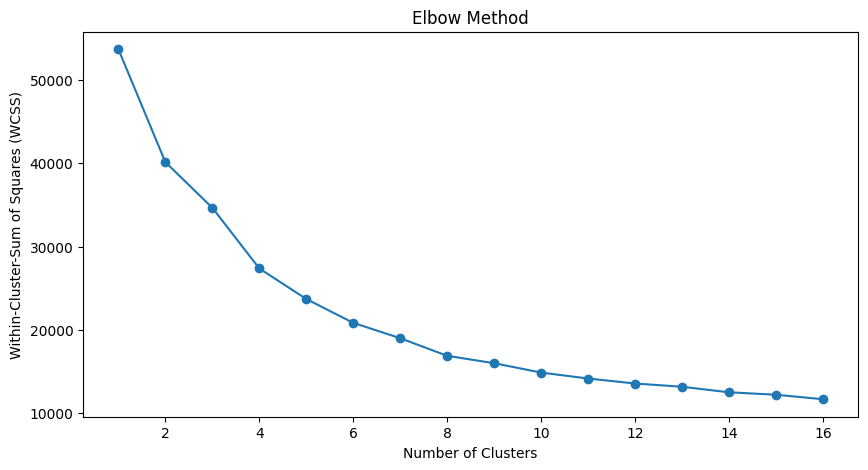

In [12]:
#1.Plot the Within-Cluster-Sum of Squares (WCSS) for different ( K ) values and find the "elbow point."
wcss = []
K_range = range(1, 17)  
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)  # WCSS

# Plot the WCSS to find the "elbow"
plt.figure(figsize=(10, 5))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster-Sum of Squares (WCSS)')
plt.show()

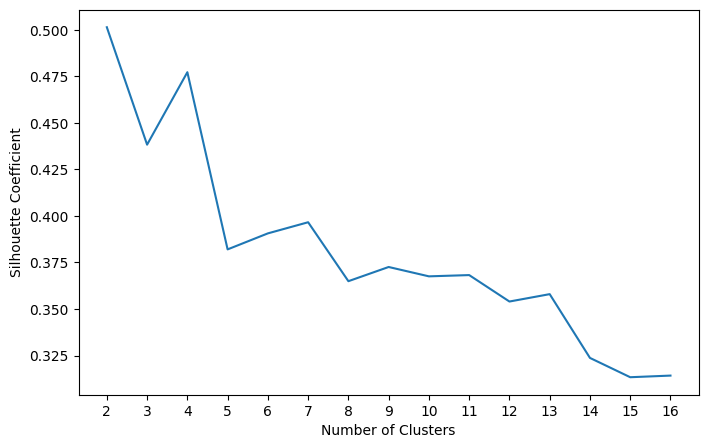

In [13]:
#2.Use the Silhouette Method to validate the number of clusters:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []

for k in range(2, 17):
     kmeans = KMeans(n_clusters=k, random_state=42)
     kmeans.fit(scaled_features)
     score = silhouette_score(scaled_features, kmeans.labels_)
     silhouette_coefficients.append(score)


plt.figure(figsize=(8, 5))
plt.plot(range(2, 17), silhouette_coefficients)
plt.xticks(range(2, 17))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()


In [14]:
#k-mean clustering method:

# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=4, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(scaled_features)

# inertia on the fitted data
kmeans.inertia_

27376.868628759512

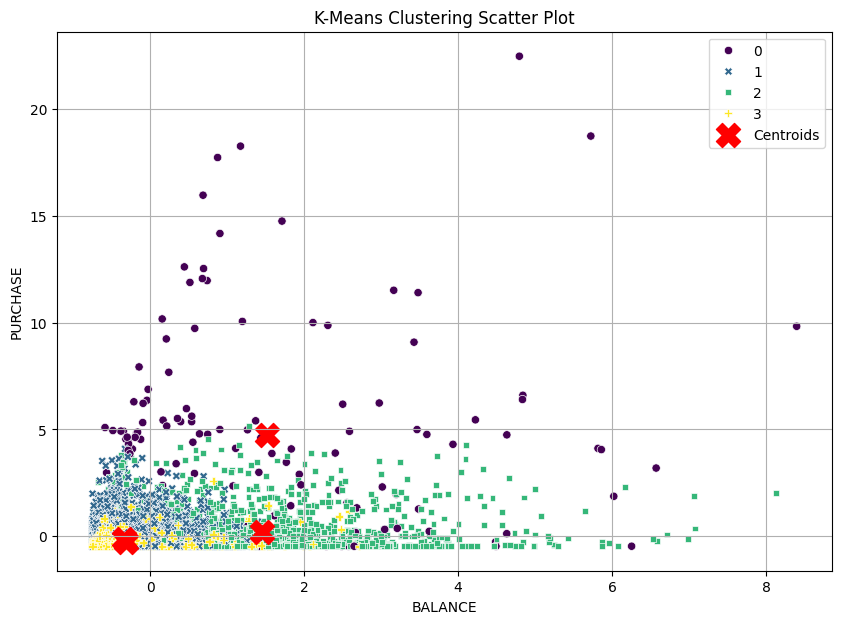

In [47]:
#cluster labels
labels = kmeans.labels_

#centroids of the clusters
centroids = kmeans.cluster_centers_

# Scatter plot of the data points colored by cluster
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=scaled_features[:, 0], 
    y=scaled_features[:, 1], 
    hue=labels, 
    palette='viridis', 
    style=labels, 
    legend="full"
)

# Plot centroids
plt.scatter(
    centroids[:, 0], 
    centroids[:, 1], 
    s=300, 
    c='red', 
    marker='X', 
    label='Centroids'
)

# Add plot details
plt.title("K-Means Clustering Scatter Plot")
plt.xlabel("BALANCE")
plt.ylabel("PURCHASE")
plt.legend()
plt.grid(True)
plt.show()


Text(0, 0.5, 'Inertia')

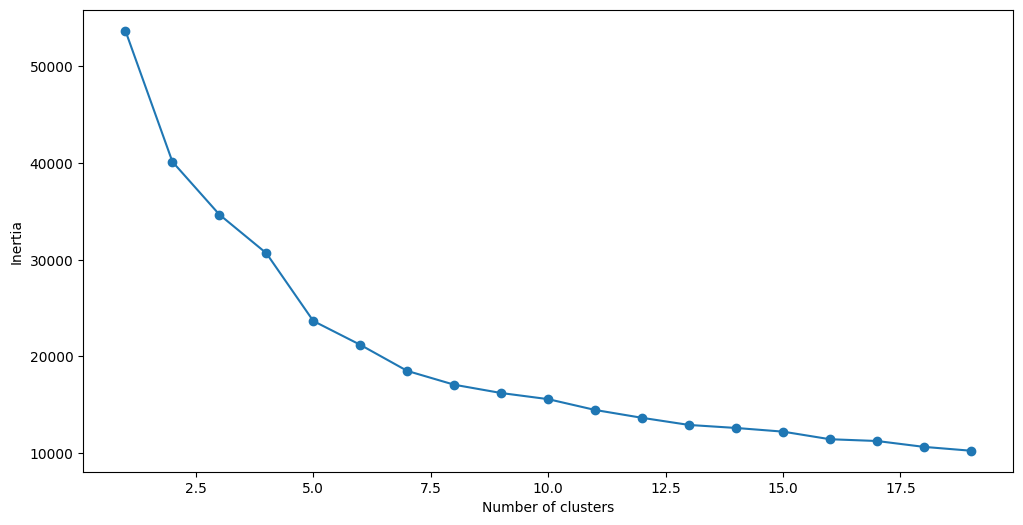

In [16]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

#### **DBSCAN:**
1. Apply DBSCAN clustering and visualize the clusters.
2. Experiment with different values of \( \varepsilon \) and `MinPts` to observe their effects.


In [17]:
from sklearn.cluster import DBSCAN
X_db = df[['BALANCE','PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','TENURE','PAYMENTS']]
dbscan = DBSCAN()
print(dbscan)
clusters_dbscan = dbscan.fit_predict(X_db)
print("Cluster memberships:\n{}".format(clusters_dbscan))

DBSCAN()
Cluster memberships:
[-1 -1 -1 ... -1 -1 -1]


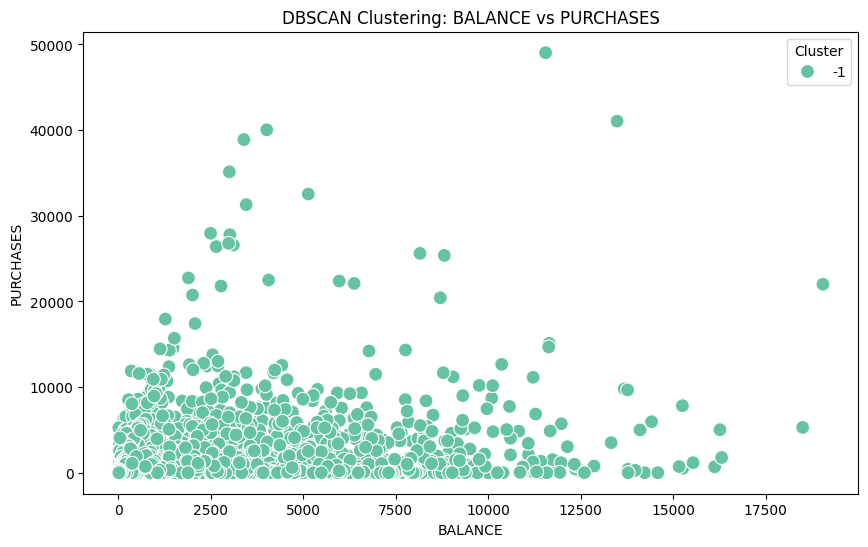

In [18]:
df['Cluster'] = clusters_dbscan

# Plot scatter plot for BALANCE vs PURCHASES
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='BALANCE', y='PURCHASES', hue='Cluster', palette='Set2', s=100)

plt.title("DBSCAN Clustering: BALANCE vs PURCHASES")
plt.legend(title="Cluster")
plt.show()


In [19]:
#2.Experiment with different values of ( \varepsilon ) and MinPts to observe their effects

for ms in list([2, 3, 5]):
    for e in list([1, 1.5, 2, 3]):
        dbscan = DBSCAN(min_samples=ms, eps=e)
        clusters_dbscan = dbscan.fit_predict(X_db)
        print("min samples: ", ms, " eps: ", e, " clusters: ", clusters_dbscan)

min samples:  2  eps:  1  clusters:  [-1 -1 -1 ... -1 -1 -1]
min samples:  2  eps:  1.5  clusters:  [-1 -1 -1 ... -1 -1 -1]
min samples:  2  eps:  2  clusters:  [-1 -1 -1 ... -1 -1 -1]
min samples:  2  eps:  3  clusters:  [-1 -1 -1 ... -1 -1 -1]
min samples:  3  eps:  1  clusters:  [-1 -1 -1 ... -1 -1 -1]
min samples:  3  eps:  1.5  clusters:  [-1 -1 -1 ... -1 -1 -1]
min samples:  3  eps:  2  clusters:  [-1 -1 -1 ... -1 -1 -1]
min samples:  3  eps:  3  clusters:  [-1 -1 -1 ... -1 -1 -1]
min samples:  5  eps:  1  clusters:  [-1 -1 -1 ... -1 -1 -1]
min samples:  5  eps:  1.5  clusters:  [-1 -1 -1 ... -1 -1 -1]
min samples:  5  eps:  2  clusters:  [-1 -1 -1 ... -1 -1 -1]
min samples:  5  eps:  3  clusters:  [-1 -1 -1 ... -1 -1 -1]


In [20]:
#determine which data points are considered to be core_points, boundray_points and noise points
ms = 3
ep = 6
dbscan = DBSCAN(min_samples=ms, eps=ep)
clusters_dbscan = dbscan.fit_predict(X_db)
print(clusters_dbscan)
print("===============================")

all_samples = np.arange(0,len(X_db))
print("All samples: ",all_samples)

core = dbscan.core_sample_indices_     
print("Core samples: ", core)

noise = np.where(clusters_dbscan == -1)[0]       # which data points have -1 label    
print("Noise: ", noise)

boundary = np.setdiff1d(np.setdiff1d(all_samples, core), noise)
print("Boundary samples: ", boundary)

[-1 -1 -1 ... -1 -1 -1]
All samples:  [   0    1    2 ... 8947 8948 8949]
Core samples:  [7691 8442]
Noise:  [   0    1    2 ... 8947 8948 8949]
Boundary samples:  [5219 5551 6095 7643]



#### **Davies-Bouldin Index:**
1. Calculate the Davies-Bouldin Index for the chosen clustering.
2. Compare which clustering approach (K-Means or DBSCAN) performs better based on the index.

---

In [21]:
#1.Calculate the Davies-Bouldin Index for the chosen clustering.
scaler = StandardScaler()
data = scaler.fit_transform(df[['BALANCE','PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','TENURE','PAYMENTS']])

# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)  
kmeans_labels = kmeans.fit_predict(data)

# Evaluate K-Means
kmeans_dbi = davies_bouldin_score(data, kmeans_labels)
print("K-Means DBI:", kmeans_dbi)


# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5) 
dbscan_labels = dbscan.fit_predict(data)

dbscan_core_data = data[dbscan_labels != -1]
dbscan_core_labels = dbscan_labels[dbscan_labels != -1]

# Evaluate DBSCAN
dbscan_dbi = davies_bouldin_score(dbscan_core_data, dbscan_core_labels)
print("DBSCAN DBI:", dbscan_dbi)

K-Means DBI: 1.1364343578255924
DBSCAN DBI: 1.0481873152314418


In [22]:
#2.Compare which clustering approach (K-Means or DBSCAN) performs better based on the index.

#Lower DBI value better perform better than K-means. From the result we can see 
#DSBSCAN have lower value than k-means which 
# means that the data is non-spherical clusters, varying densities, or significant noise. 


### 4. Insights
- Analyze each cluster and identify characteristics (e.g., high spenders, frequent users).
- Suggest strategies for personalized marketing based on the clusters.

---

In [ ]:
#From cluster, we can see people who purchase more are mostly balance of credit card is lower.
#The high the spenders, the lower the balance.
#Moreover, frequent users clearly can see where their balance are between 2500 to 10000 of credit balance.
# Instead of that, low spend and inactive user can be see where their balance 
#are higher and not frequent spend on purchases.

In [ ]:
#Suggest strategies : 1.From the cluster results, company can target which users that are spends more 
# and give some promotion and loyalty progmram to target users.
# 2. For frequent users, company can do time limited promotion to urges the user to spend more.
# 3. For low spender and inactive user, company can email or promote using social media to promote users 
# to spend more(promotion discount) adn also survey feedback from the user about their experince with the product.

In [23]:
#deep learning 

In [5]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn import datasets
from keras.datasets import mnist
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras

In [6]:

# load the dataset
dataset = pd.read_csv("CC GENERAL.csv")


In [53]:
dataset.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [10]:
#drop data with object
dataset = dataset.drop(columns=['CUST_ID'])

KeyError: "['CUST_ID'] not found in axis"

In [28]:

#KeyError: "['CUST_ID'] not found in axis", I run back this cell that why the result is error.

In [18]:
count_retain = len(dataset[dataset['BALANCE']==0])
count_churn = len(dataset[dataset['BALANCE']==1])
percent_retain = count_retain/(count_retain+count_churn)
print("Percent of Retained Customers", percent_retain*100)
percent_churn = count_churn/(count_retain+count_churn)
print("Percent of Churned Customerns", percent_churn*100)

Percent of Retained Customers 100.0
Percent of Churned Customerns 0.0


In [11]:
# Split and shuffle  dataset.
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(dataset.copy(), test_size=0.2)
train_data, val_data = train_test_split(train_data, test_size=0.2)

# Form np arrays of labels and features.
y_train = np.array(train_data.pop('BALANCE'))
bool_y_train = y_train != 0
y_val = np.array(val_data.pop('BALANCE'))
y_test = np.array(test_data.pop('BALANCE'))

X_train = np.array(train_data)
X_val = np.array(val_data)
X_test = np.array(test_data)

In [12]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train = np.clip(X_train, -5, 5)
X_val = np.clip(X_val, -5, 5)
X_test= np.clip(X_test, -5, 5)


print('Training labels shape:', y_train.shape)
print('Validation labels shape:', y_val.shape)
print('Test labels shape:', y_test.shape)

print('Training features shape:', X_train.shape)
print('Validation features shape:', X_val.shape)
print('Test features shape:', X_test.shape)

Training labels shape: (5728,)
Validation labels shape: (1432,)
Test labels shape: (1790,)
Training features shape: (5728, 16)
Validation features shape: (1432, 16)
Test features shape: (1790, 16)


In [13]:
#2.Logistic Regression with Neural Networks
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn import datasets
from keras.datasets import mnist
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
import functools


np.random.seed(42)

import os
import tempfile
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 6)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras import layers, regularizers



In [14]:
modelA = keras.Sequential([
    tf.keras.layers.Dense(2, activation='relu', input_shape=[len(X_train[0])]),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1,   activation='sigmoid')
        
  ])

# Compile model
modelA.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Prepare training model log storage
logdirA = os.path.join("logs","modelA", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callbackA = tf.keras.callbacks.TensorBoard(logdirA, histogram_freq=1)


# Train modelA
historyA = modelA.fit(X_train, y_train,
                    epochs=20, 
                    batch_size=100,
                    validation_data=(X_val, y_val), 
                    verbose=1,
                    callbacks=[tensorboard_callbackA])


# Evaluate modelA
modelA.evaluate(X_test, y_test)

# Use trained modelA to predict on test dataset
modelA.predict(X_test)


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 7.9050e-04 - loss: -58.0707 - val_accuracy: 0.0000e+00 - val_loss: -200.7227
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0000e+00 - loss: -254.4521 - val_accuracy: 0.0000e+00 - val_loss: -419.9179
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0000e+00 - loss: -480.6098 - val_accuracy: 0.0000e+00 - val_loss: -661.5396
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0000e+00 - loss: -742.2065 - val_accuracy: 0.0000e+00 - val_loss: -924.8723
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0000e+00 - loss: -1023.2296 - val_accuracy: 0.0000e+00 - val_loss: -1210.2604
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0000e+00 - loss: -1316.3553 - val_accuracy: 0.0000e+00 - val_loss: -1518.3136
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0000e+00 - loss: -1620.8210 - val_accuracy: 0.0000e+00 - val_loss: -1847.4689
Epoch 8/20
58/

array([[0.9949659],
       [0.9949659],
       [0.9949659],
       ...,
       [0.9949659],
       [0.9949659],
       [0.9949659]], dtype=float32)

In [21]:
# computes the loss is given below
bce = tf.keras.losses.BinaryCrossentropy()
loss = bce([0., 0., 1., 1.], [1., 1., 1., 0.])
print('Loss: ', loss.numpy())

Loss:  12.000716


In [33]:
#Improving Neural Network Performance

In [22]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]

In [23]:
EPOCHS = 20
BATCH_SIZE = 2048

In [24]:
def build_model(metrics = METRICS, output_bias=None):
    model = tf.keras.Sequential([
            tf.keras.layers.Dense(32, activation='relu', input_shape=[len(train_data.keys())]),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid', 
                                 bias_initializer=output_bias)
             ])

    model.compile(
          optimizer=tf.keras.optimizers.Adam(),
          loss=tf.keras.losses.BinaryCrossentropy(),
          metrics=METRICS)
    
    return model

In [25]:
modelB = build_model()
modelB_eval = modelB.evaluate(X_train, y_train, batch_size=BATCH_SIZE, verbose=0)

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
modelB_eval

[1305.9642333984375,
 105.0,
 0.0,
 47.0,
 5576.0,
 0.008205307647585869,
 1.0,
 0.018482660874724388,
 0.8483260869979858]

In [27]:
initial_weights = os.path.join(tempfile.mkdtemp(),'initial_weights.weights.h5')
modelB.save_weights(initial_weights)

In [28]:
modelC = build_model()
modelC_eval = modelC.evaluate(X_train, y_train, batch_size=BATCH_SIZE, verbose=0)

In [29]:
init_bias = np.log([count_churn/count_retain])
output_bias = tf.keras.initializers.Constant(init_bias)
print("Initial Bias: {}".format(init_bias[0]))

Initial Bias: -inf


C:\Users\USER\AppData\Local\Temp\ipykernel_8328\2741062439.py:1: RuntimeWarning: divide by zero encountered in log
  init_bias = np.log([count_churn/count_retain])


In [30]:
modelD = build_model(output_bias=output_bias)
modelD_eval = modelD.evaluate(X_train, y_train, batch_size=BATCH_SIZE, verbose=0)

In [34]:
print("modelC Loss:{}".format(modelC_eval[0]))
print("modelD Loss:{}".format(modelD_eval[0]))

modelC Loss:-1298.044921875
modelD Loss:nan


In [35]:
modelE = build_model()
modelE.load_weights(initial_weights)
modelE.layers[-1].bias.assign([0.0])

# 2. 
logdirE = os.path.join("logs", "modelE", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callbackE = tf.keras.callbacks.TensorBoard(logdirE, histogram_freq=1)

# 3. 
zero_bias_history = modelE.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(X_val, y_val),
    verbose=0,
    callbacks = [tensorboard_callbackE] )

In [36]:
modelF = build_model()
modelF.load_weights(initial_weights)

# 2. 
logdirF = os.path.join("logs", "modelF", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callbackF = tf.keras.callbacks.TensorBoard(logdirF, histogram_freq=1)

# 3. 
careful_bias_history = modelE.fit(
     X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(X_val, y_val), 
    verbose=0,
    callbacks = [tensorboard_callbackF])

In [37]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [38]:
modelG = build_model()
modelG.load_weights(initial_weights)

# 2. 
logdirG = os.path.join("logs", "modelG", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callbackG = tf.keras.callbacks.TensorBoard(logdirG, histogram_freq=1)

# 3. 
baseline_history = modelG.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_val, y_val), 
    verbose=0,
    callbacks = [early_stopping, tensorboard_callbackG])

Epoch 11: early stopping
Restoring model weights from the end of the best epoch: 1.


In [ ]:
#cannot do next step due to error